In [1]:
#possible to predict actual weather with the forecast?
from common import data_folder_path
import os
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
electricity_prices_df = pd.read_csv(os.path.join(data_folder_path,'electricity_prices.csv'))
gas_prices_df = pd.read_csv(os.path.join(data_folder_path,'gas_prices.csv'))

In [4]:
electricity_prices_df

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1
...,...,...,...,...
15281,2023-05-30 19:00:00,82.10,2023-05-29 19:00:00,637
15282,2023-05-30 20:00:00,150.85,2023-05-29 20:00:00,637
15283,2023-05-30 21:00:00,82.10,2023-05-29 21:00:00,637
15284,2023-05-30 22:00:00,82.09,2023-05-29 22:00:00,637


In [5]:
gas_prices_df

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5
...,...,...,...,...,...
632,2023-05-26,29.10,34.10,2023-05-25,633
633,2023-05-27,28.30,34.10,2023-05-26,634
634,2023-05-28,28.10,34.10,2023-05-27,635
635,2023-05-29,28.16,36.98,2023-05-28,636


In [11]:
electricity_prices_df['forecast_date'] = pd.to_datetime(electricity_prices_df['forecast_date'])
elec_prices_by_day_df = electricity_prices_df.copy()
elec_prices_by_day_df.index = elec_prices_by_day_df['forecast_date']
elec_prices_by_day_df = elec_prices_by_day_df.resample('1D').ffill()
elec_prices_by_day_df['euros_per_mwh']

forecast_date
2021-09-01     92.51
2021-09-02     96.99
2021-09-03     86.20
2021-09-04    111.41
2021-09-05     95.61
               ...  
2023-05-26     62.94
2023-05-27     87.54
2023-05-28     85.00
2023-05-29     12.38
2023-05-30      8.57
Freq: D, Name: euros_per_mwh, Length: 637, dtype: float64

In [14]:
gas_prices_df['forecast_date'] = pd.to_datetime(gas_prices_df['forecast_date'])
gas_prices_df.index = gas_prices_df['forecast_date']
gas_prices_df

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
forecast_date,,,,,
2021-09-01,2021-09-01,45.23,46.32,2021-08-31,1
2021-09-02,2021-09-02,45.62,46.29,2021-09-01,2
2021-09-03,2021-09-03,45.85,46.40,2021-09-02,3
2021-09-04,2021-09-04,46.30,46.80,2021-09-03,4
2021-09-05,2021-09-05,46.30,46.58,2021-09-04,5
...,...,...,...,...,...
2023-05-26,2023-05-26,29.10,34.10,2023-05-25,633
2023-05-27,2023-05-27,28.30,34.10,2023-05-26,634
2023-05-28,2023-05-28,28.10,34.10,2023-05-27,635


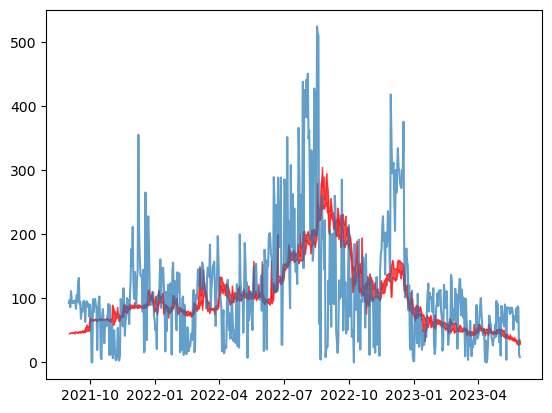

In [20]:
plt.plot(elec_prices_by_day_df['euros_per_mwh'], label='electricity',alpha=0.7)
plt.fill_between(gas_prices_df.index, gas_prices_df['lowest_price_per_mwh'],gas_prices_df['highest_price_per_mwh'], alpha=0.7,color='red')

In [ ]:
# gas prices are much less volatile than electricity prices
# gas prices tend to follow a moving average of electricity prices
# the spike in electricity prices in late 2022 precedes the spike in gas prices, 
# so gas prices lag a little in volatility and are generally stickier,
# not reacting to volatility unless the volatility lasts for a significant amount of time